In [1]:
# import pandas
%matplotlib inline
import pandas as pd

# Prepare datetime index

In [2]:
# read history price from html page
bc_url = 'https://coinmarketcap.com/currencies/bitcoin/historical-data/?start=20130428&end=20190902'
bc = pd.read_html(bc_url)[0]
bc.head(3)

,Date,Open*,High,Low,Close**,Volume,Market Cap
0,"Sep 02, 2019",9757.47,10396.59,9730.65,10346.76,17248102294,185333114163
1,"Sep 01, 2019",9630.59,9796.76,9582.94,9757.97,11445355859,174768292883
2,"Aug 31, 2019",9597.54,9673.22,9531.80,9630.66,11454806419,172470743516


In [3]:
# check columns type with dtypes
bc.dtypes

Date           object
Open*         float64
High          float64
Low           float64
Close**       float64
Volume         object
Market Cap      int64
dtype: object

In [4]:
# convert to datetime data type with to_datetime
bc.Date = pd.to_datetime(bc.Date)
bc.dtypes

Date          datetime64[ns]
Open*                float64
High                 float64
Low                  float64
Close**              float64
Volume                object
Market Cap             int64
dtype: object

In [5]:
# set datetime column as index
bc.set_index(bc.Date, inplace=True)
bc.head(3)

,Date,Open*,High,Low,Close**,Volume,Market Cap
Date,,,,,,,
2019-09-02,2019-09-02,9757.47,10396.59,9730.65,10346.76,17248102294,185333114163
2019-09-01,2019-09-01,9630.59,9796.76,9582.94,9757.97,11445355859,174768292883
2019-08-31,2019-08-31,9597.54,9673.22,9531.80,9630.66,11454806419,172470743516


In [6]:
# sort_index with ascending=False so small time at the top
bc.sort_index(ascending=True, inplace=True)
bc.head(3)

,Date,Open*,High,Low,Close**,Volume,Market Cap
Date,,,,,,,
2013-04-28,2013-04-28,135.30,135.98,132.10,134.21,-,1488566728
2013-04-29,2013-04-29,134.44,147.49,134.00,144.54,-,1603768865
2013-04-30,2013-04-30,144.00,146.93,134.05,139.00,-,1542813125


# Select data use datetime index

In [17]:
# select a date '2017-12-31' with .loc
bc.loc['2017-12-31']

Date          2017-12-31 00:00:00
Open*                     12897.7
High                      14377.4
Low                       12755.6
Close**                   14156.4
Volume                12136299520
Market Cap           237465823980
Name: 2017-12-31 00:00:00, dtype: object

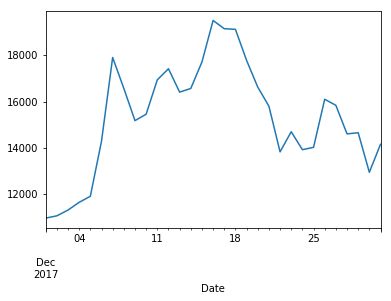

In [19]:
# select a month '2017-12' with .loc
bc.loc['2017-12']['Close**'].plot()

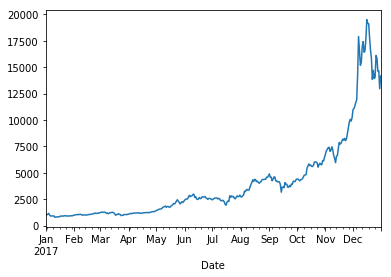

In [20]:
# select one year 2017
bc.loc['2017']['Close**'].plot()

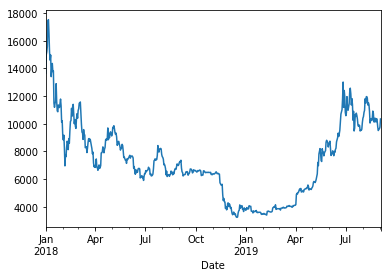

In [21]:
# select 2 year with slicing '2018':'2019'
bc.loc['2018':'2019']['Close**'].plot()

# Resampling

In [30]:
# resample by month with mean function the plot close price
bc_2018 = bc.loc['2018']

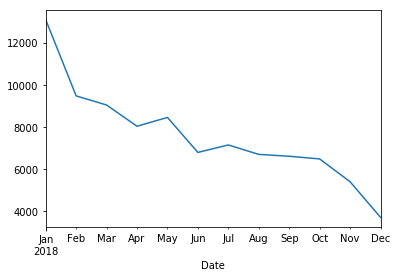

In [32]:
bc_2018.resample('M').mean()['Close**'].plot()

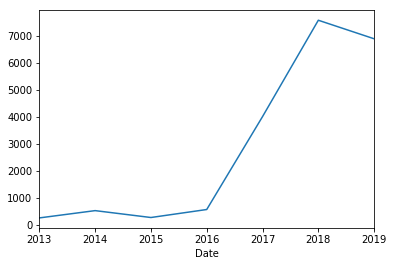

In [35]:
# resample by year and plot close price
bc.resample('Y').mean()['Close**'].plot()